# Ларіонов Олександр КМ-83.  Курсова робота.

# Метод Нелдера-Міда.


## Зміст

## Постановка задачі

Дослідити збіжність метода Нелдера-Міда при мінімізації кореневої функції в залежності від:
1.	Розміру початкового симплексу.
2.	Значень параметрів деформації та редукції багатогранника.
3.	Модифікацій метода.


## Теоретичні відомості

Метод Нелдера-Міда – метод оптимізації (пошуку мінімуму) функції від декількох змінних. Простий і в той же час ефективний метод, що дозволяє оптимізувати функції без використання градієнтів.
Алгоритм полягає в формуванні симплекса і подальшого його деформування в напрямку мінімуму, за допомогою трьох операцій:

	1. Відображення
	2. Розтягування
	3. Стиснення

Симплекс вдає із себе геометричну фігуру, яка є n - мірним узагальненням трикутника. Для одновимірного простору - це відрізок, для двовимірного - трикутник. Таким чином n - мірний симплекс має n + 1 вершину.

Алгоритм:

Нехай f(x) функція, яку необхідно оптимізувати. На першому кроці вибираємо три випадкові точки і формуємо симплекс (трикутник). Обчислюємо значення функції в кожній точці: f(V1), f(V2), f(V3). Сортуємо точки за значеннями функції в цих точках, таким чином отримуємо подвійну нерівність: f(V2)≤f(V1)≤f(V3). 

Оскільки виконується пошук мінімуму функції, то на даному кроці буде найкращою та точка, в якій значення функції мінімальне. Для спрощення точки позначаються наступним чином: 
b = V2, g = V1, w = V3, де b – best (найкраща точка), g – good (середня точка), w – wrong (погана точка) відповідно. 
 
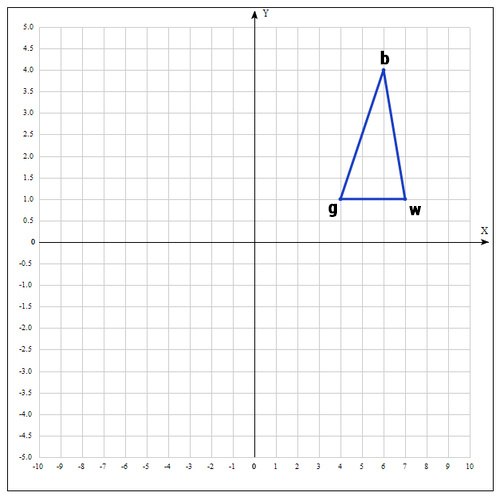

На наступному кроці знаходимо середину відрізка, точками якого є g і b. Оскільки координати середини відрізка рівні напівсумі координат його кінців, отримуємо:
$
mid=((x1+x2)/2; (y1+y2)/2) $

$
mid=1/n ∑_(i=1)^n|xi
$

Застосовуємо операцію відображення:

Знаходимо точку xr наступним чином: 

Xr=mid+ α (mid-w)

Тобто фактично відображуємо точку w відносно mid. Коефіцієнт α зазвичай приймають рівним 1. Після цього перевіряється наша точка: 
Якщо f(Xr)<f(g), то це добра точка.


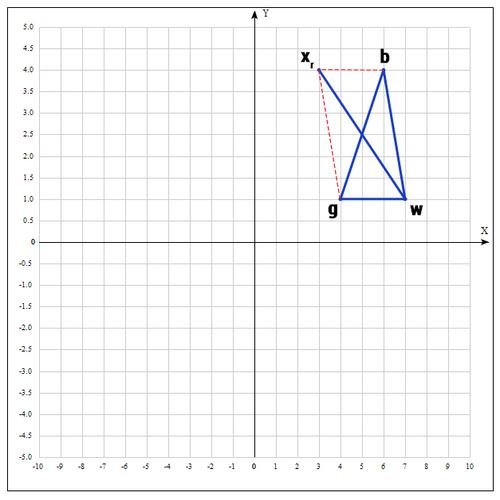

Використовується операція розтягування:

Знаходиться точка хе наступним чином:

$
Xe=mid+ ϒ (Xr-mid)
$

В якості ϒ приймаємо ϒ=2, тобто відстань збільшуємо у 2 рази. Після цього перевіряємо точку хе:
Якщо f(Xе)<f(b), то це означає, що знайдена краща точка, ніж та, яка є на даний момент. Якщо б цього не відбулось, то кращою залишалась би точка хr. Далі точка w замінюється на xe и в результаті отримується: 


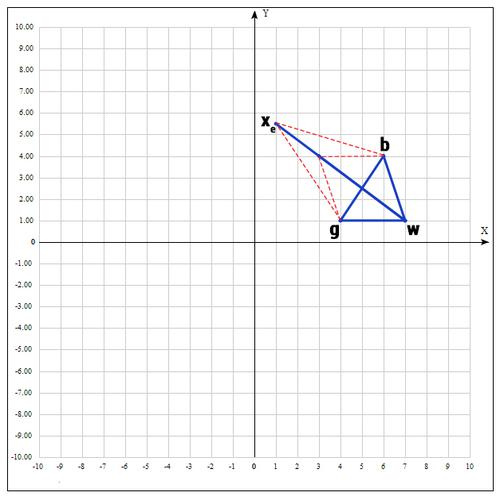

Якщо впродовж цих кроків не було знайдено хороших точок, то потрібно пробувати операцію стискання. Під час цієї операції зменшується відрізок і точки знаходяться всередині трикутника.
Знаходиться хороша точка хс: 

$
Хс = mid+ β (w-mid)
$

Коефіцієнт β приймається рівним 0.5, тобто точка знаходиться на середині відрізка w… mid:


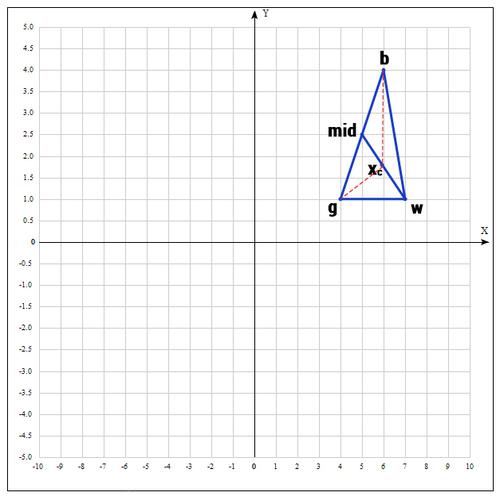

Існує ще одна операція – скорочення. В даному випадку, ми перевизначаємо весь симплекс. Ми залишаємо тільки «кращу» точку, інші визначаємо наступним чином:

$
Xj= b+ δ (Xj-b)
$

 де коефіцієнт δ = 0.5

Загалом, існуючі точки переміщуються по направленню до поточної «кращої» точки. Перетворення виглядає наступним чином:


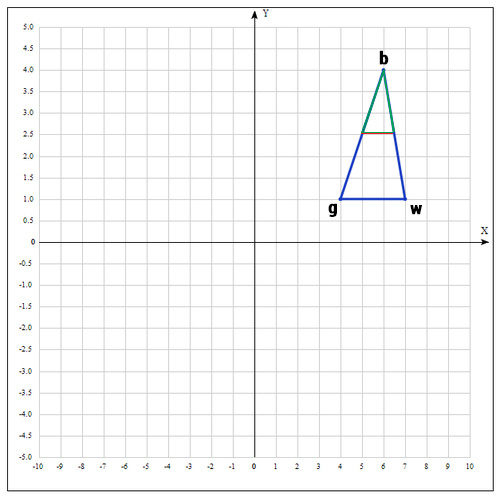

Необхідно відмітити, що дана операція дорого обходиться, оскільки необхідно заміняти точки в симплексі, тому ця операція дуже рідко зустрічається на практиці.
Алгоритм закінчується, коли: 

-	Було виконано необхідну кількість ітерацій
-	Площа симплекса досягла певної величини
-	Поточне краще рішення досягло необхідної точності

Перевагами даного методу є те, що він являється дуже ефективним алгоритмом пошуку екстремуму функції багатьох змінних, не накладуючим обмеження на гладкість функції. На кожній ітерації алгоритму проводиться як правило одне-два обчислення значень функції, що надзвичайно ефективно якщо ці обчислення дуже повільні. Крім того, алгоритму дуже простий в реалізації. Крім того даний алгоритм простий в реалізації. 
Недоліками даного методу являється неможливість відрізнити локальний максимум від глобального, а також відсутність теорії збіжності і наявність прикладів, коли метод розходиться навіть на гладких функціях.


## Реалізація методу

Імпортуємо модулі

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Побудуємо графік функції

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


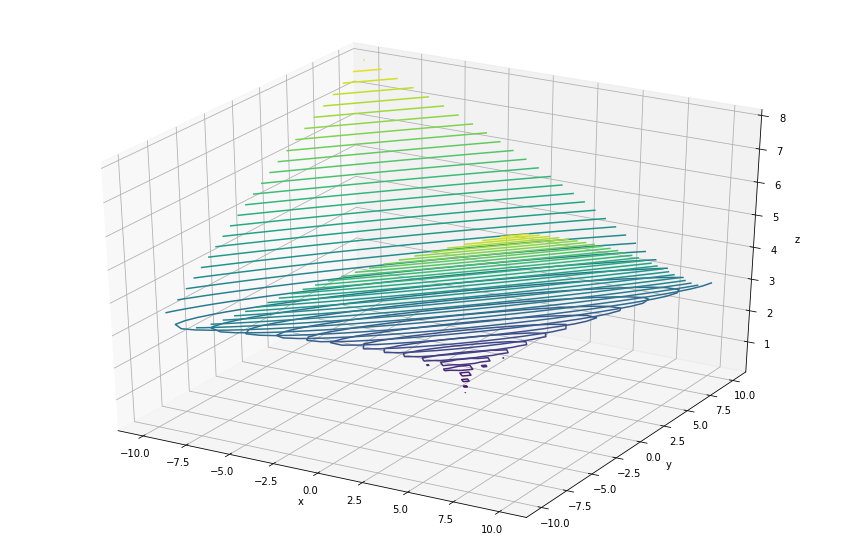

In [ ]:
def function(x, y):  # коренева функція
    return (10 * (x-y)**2 + (x - 1) ** 2 ) ** 0.25

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = function(X, Y)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 40)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
#@title Параметри
ALPHA =  1#@param {type:"number"}
GAMMA =  2#@param {type:"number"}
BETHA = 0.5 #@param {type:"number"}

In [ ]:
#@title Початкові точки
x1 =  5#@param {type:"number"}
y1 = 5 #@param {type:"number"}

x2 =  3#@param {type:"number"}
y2 =  4#@param {type:"number"}

x3 =  6#@param {type:"number"}
y3 =  3#@param {type:"number"}

### Класс Point
Для зручності створюємо класс Point - Точка.

В кожній точці я одразу буду зберігати значення функції. (В атрибуті value)

In [ ]:
class Point:
  aplha = None
  betha = None
  gamma = None

  def __init__(self, x, y, f, need_calc=True):
    self.x = x
    self.y = y
    self.f = f
    self.value = f(x, y) if need_calc else None

  @classmethod
  def init(cls, alpha, betha, gamma):
    cls.alpha = alpha
    cls.betha = betha
    cls.gamma = gamma
  
  def __getitem__(self, index):
    if index == 0:
      return self.x
    if index == 1:
      return self.y
    if index == 2:
      return self.value
    else:
      raise ValueError(f'Шось не то передали: {index}, буває:)')
    
  def calc_value(self):
    self.value = self.f(self.x, self.y)
  
  @staticmethod
  def sort_points_by_value(points):
    points.sort(key=lambda point: point.value)
    return points
  
  def __str__(self):
    text = f"точка [{self.x}; {self.y}]"
    if self.value is not None:
      text += f' (Значення функції = {round(self.value, 5)})'
    return text
  
  def __repr__(self):
    return self.__str__()
  
  @classmethod
  def calc_med_point(cls, good, best):
    return Point((good.x + best.x)/2, (good.y + best.y)/2, function, False)
  
  @classmethod
  def calc_mirrored_point(cls, med_point, worst):
    return Point((1 + cls.alpha)*med_point.x - cls.alpha * worst.x, (1 + cls.alpha)*med_point.y - cls.alpha*worst.y, function)

  @classmethod
  def calc_e_point(cls, mirrored_point, med_point):
    return Point(cls.gamma*mirrored_point.x + (1 - cls.gamma) * med_point.x, cls.gamma*mirrored_point.y + (1 - cls.gamma) * med_point.y, function)

  @classmethod
  def calc_s_point(cls, worst, med_point):
    return Point(cls.betha*worst.x + (1 - cls.betha)*med_point.x, cls.betha*worst.y + (1 - cls.betha)*med_point.y, function)

  

Створюємо точки.

Це буде наш початковий симплекс.

In [ ]:
point1 = Point(x1, y1, function)
point2 = Point(x2, y2, function)
point3 = Point(x3, y3, function)
print(point1, point2, point3, sep='\n')

точка [5; 5] (Значення функції = 2.0)
точка [3; 4] (Значення функції = 1.93434)
точка [6; 3] (Значення функції = 3.27472)


### Реалізація базового алгоритму

Тепер настав час для реалізації алгоритму Нелдерa-Міда

In [ ]:
def nelder_mid(point1, point2, point3, iterations_count=50, alpha=ALPHA, betha=BETHA, gamma=GAMMA):
  Point.init(alpha, betha, gamma)
  points = Point.sort_points_by_value([point1, point2, point3])

  count_func_calls = 3
  i = 0
  while i < iterations_count:
      best = points[0]
      good = points[1]
      worst = points[2]
      print('\n' + '-' * 30)
      print("Ітерація ", i + 1)
      print("Найкраща:", best)
      print("Середня:", good)
      print("Найгірша:", worst)
      print()

      med_point = Point.calc_med_point(good, best)
      print("Середина відрізку:", med_point)

      mirrored_point = Point.calc_mirrored_point(med_point, worst)
      count_func_calls += 1
      print("Віддзеркалена точка: ", mirrored_point)

      if mirrored_point.value < best.value:
        e_point = Point.calc_e_point(mirrored_point, med_point)  # розтягування
        count_func_calls += 1
        if e_point.value < mirrored_point.value:
          print('! Відбулося подвійне розтягнення')
          worst = e_point
        else:
          print('! Відбулося відображення')
          worst = mirrored_point
      
      elif best.value < mirrored_point.value < good.value:
        print('! Відбулося відображення')
        worst = mirrored_point
      
      elif good.value < mirrored_point.value:
        if mirrored_point.value < worst.value:
          print('! Відбулося відображення')
          worst = mirrored_point
        else:
          # стиснення
          s_point = Point.calc_s_point(worst, med_point)
          if s_point.value < worst.value:
            print('! Відбулося стиснення')
            worst = s_point
          else:
            # глобальне стиснення
            print('! Відбулося скорочення (shrink)')
            good = Point(good[0] + (best[0] - good[0])/2, good[1] + (best[1] - good[1])/2, function)
            worst = Point(worst[0] + (best[0] - worst[0])/2, worst[1] + (best[1] - worst[1])/2, function)
            count_func_calls += 2

      points = [best, good, worst]
      Point.sort_points_by_value(points)

      i += 1
      print("Кількість підрахунку функції = ", count_func_calls)

In [ ]:
nelder_mid(point1, point2, point3)


------------------------------
Ітерація  1
Найкраща: точка [3; 4] (Значення функції = 1.93434)
Середня: точка [5; 5] (Значення функції = 2.0)
Найгірша: точка [6; 3] (Значення функції = 3.27472)

Середина відрізку: точка [4.0; 4.5]
Віддзеркалена точка:  точка [2.0; 6.0] (Значення функції = 3.5621)
! Відбулося стиснення
Кількість підрахунку функції =  4

------------------------------
Ітерація  2
Найкраща: точка [3; 4] (Значення функції = 1.93434)
Середня: точка [5; 5] (Значення функції = 2.0)
Найгірша: точка [5.0; 3.75] (Значення функції = 2.37142)

Середина відрізку: точка [4.0; 4.5]
Віддзеркалена точка:  точка [3.0; 5.25] (Значення функції = 2.71862)
! Відбулося стиснення
Кількість підрахунку функції =  5

------------------------------
Ітерація  3
Найкраща: точка [4.5; 4.125] (Значення функції = 1.92235)
Середня: точка [3; 4] (Значення функції = 1.93434)
Найгірша: точка [5; 5] (Значення функції = 2.0)

Середина відрізку: точка [3.75; 4.0625]
Віддзеркалена точка:  точка [2.5; 3.125] 

Як бачимо, метод працює і обчислює мінімум функції.

Тепер трохи переробимо його для здійснення візуалізації.

### Візуалізація роботи методу

In [ ]:
def nelder_mid_visual(point1, point2, point3, iterations_count=50, alpha=ALPHA, betha=BETHA, gamma=GAMMA):
  points_history = []
  
  Point.init(alpha, betha, gamma)
  points = Point.sort_points_by_value([point1, point2, point3])

  points_history.extend(points)  # для майбутньої візуалізації

  count_func_calls = 3
  i = 0
  while i < iterations_count:
      best = points[0]
      good = points[1]
      worst = points[2]

      med_point = Point.calc_med_point(good, best)

      mirrored_point = Point.calc_mirrored_point(med_point, worst)
      count_func_calls += 1

      if mirrored_point.value < best.value:
        e_point = Point.calc_e_point(mirrored_point, med_point)  # розтягування
        count_func_calls += 1
        if e_point.value < mirrored_point.value:
          worst = e_point
        else:
          worst = mirrored_point
        points_history.append(worst)
      
      elif best.value < mirrored_point.value < good.value:
        worst = mirrored_point
        points_history.append(worst)
      
      elif good.value < mirrored_point.value:
        if mirrored_point.value < worst.value:
          worst = mirrored_point
        else:
          # стиснення
          s_point = Point.calc_s_point(worst, med_point)
          if s_point.value < worst.value:
            worst = s_point
          else:
            # глобальне стиснення
            good = Point(good[0] + (best[0] - good[0])/2, good[1] + (best[1] - good[1])/2, function)
            worst = Point(worst[0] + (best[0] - worst[0])/2, worst[1] + (best[1] - worst[1])/2, function)
            count_func_calls += 2
            points_history.append(good)
        points_history.append(worst)

      points = [best, good, worst]
      Point.sort_points_by_value(points)

      i += 1
  return points_history

Тепер імпортуємо pylab і зобразимо лінії рівнів функції.

Поверх зобразимо шлях нашого симплексу по точкам.

[точка [3; 4] (Значення функції = 1.93434), точка [5; 5] (Значення функції = 2.0), точка [6; 3] (Значення функції = 3.27472), точка [5.0; 3.75] (Значення функції = 2.37142), точка [4.5; 4.125] (Значення функції = 1.92235), точка [2.5; 3.125] (Значення функції = 1.57518), точка [3.25; 3.8125] (Значення функції = 1.69358), точка [3.6875; 3.796875] (Значення функції = 1.64611), точка [2.78125; 2.7578125] (Значення функції = 1.33521), точка [1.59375; 2.0859375] (Значення функції = 1.29067), точка [1.875; 1.71875] (Значення функції = 1.00243), точка [0.6875; 1.046875] (Значення функції = 1.08565), точка [0.96875; 0.6796875] (Значення функції = 0.95636), точка [1.0546875; 1.123046875] (Значення функції = 0.47221), точка [0.1484375; 0.083984375] (Значення функції = 0.93574), точка [0.78515625; 0.6416015625] (Значення функції = 0.70868), точка [1.69140625; 1.6806640625] (Значення функції = 0.83201), точка [1.3056640625; 1.281494140625] (Значення функції = 0.56132), точка [0.982666015625; 0.921

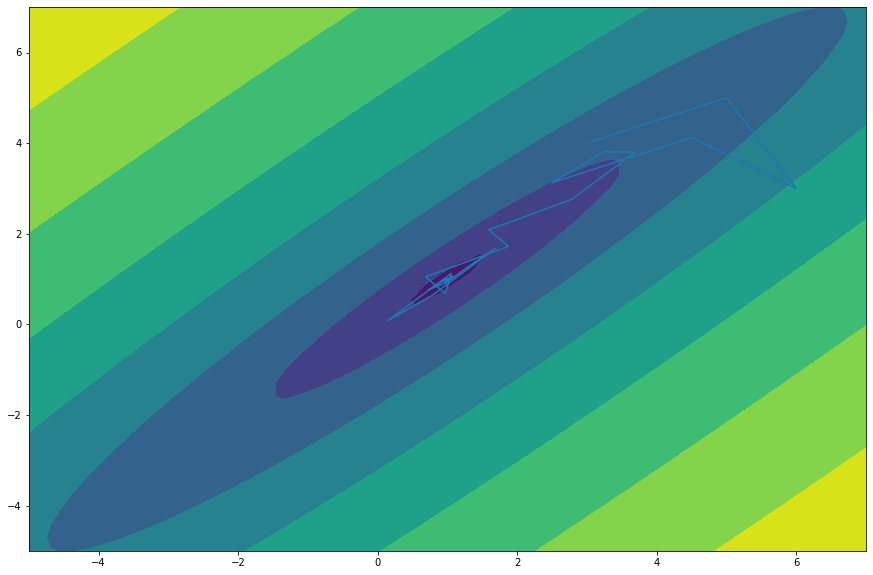

In [ ]:
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

points_history = nelder_mid_visual(point1, point2, point3)
print(points_history)

x, y = np.linspace(-5, 7, 40), np.linspace(-5, 7, 40)
X, Y = np.meshgrid(x, y)

z = function(X, Y)

pylab.contourf(X, Y, z)
pylab.plot([point.x for point in points_history], [point.y for point in points_history])
pylab.show()


Бачимо, як наш симплекс шукав точку мінімуму.

Зверху також вивів список точок, по яким переміщувався симплекс. Тож можна все перевірити.



### Аналіз і статистика

Для аналізу методу мені знадобиться іще одна його реалізація.

Тут я додам підрахунок різних операцій, і проведу експеримент зі зміною параметрів деформації та редукції багатокутника.

In [ ]:
import time


def nelder_mid_analytic(point1, point2, point3, max_iterations_count=500, eps=0.001, alpha=ALPHA, betha=BETHA, gamma=GAMMA):
  t1 = time.time()
  Point.init(alpha, betha, gamma)
  points = Point.sort_points_by_value([point1, point2, point3])

  counts = {
      'відображення': 0,
      'подвійне розтягнення': 0,
      'стискання': 0,
      'скорочення': 0,
      'функція': 3
  }

  i = 0
  while i < max_iterations_count:
      best = points[0]
      good = points[1]
      worst = points[2]

      if eps > best.value:
        break

      med_point = Point.calc_med_point(good, best)

      mirrored_point = Point.calc_mirrored_point(med_point, worst)
      counts['функція'] += 1

      if mirrored_point.value < best.value:
        e_point = Point.calc_e_point(mirrored_point, med_point)  # розтягування
        counts['функція'] += 1
        if e_point.value < mirrored_point.value:
          counts['подвійне розтягнення'] += 1
          worst = e_point
        else:
          counts['відображення'] += 1
          worst = mirrored_point
      
      elif best.value < mirrored_point.value < good.value:
        counts['відображення'] += 1
        worst = mirrored_point
      
      elif good.value < mirrored_point.value:
        if mirrored_point.value < worst.value:
          counts['відображення'] += 1
          worst = mirrored_point
        else:
          # стиснення
          s_point = Point.calc_s_point(worst, med_point)
          if s_point.value < worst.value:
            counts['стискання'] += 1
            worst = s_point
          else:
            # глобальне стиснення
            counts['скорочення'] += 1
            good = Point(good[0] + (best[0] - good[0])/2, good[1] + (best[1] - good[1])/2, function)
            worst = Point(worst[0] + (best[0] - worst[0])/2, worst[1] + (best[1] - worst[1])/2, function)
            counts['функція'] += 2

      points = [best, good, worst]
      Point.sort_points_by_value(points)

      i += 1
  counts['ітерацій'] = i
  counts['час'] = time.time() - t1
  return counts

Для початку перевіримо різницю в роботі метода при різних розмірах початкового симплексу.

Насамперед перевіримо симплекси різного розміру, в які входить точка мінімуму.

In [ ]:
stat1 = nelder_mid_analytic(Point(3, 3, function),Point(4, 2, function), Point(1, 3, function)) # малий розмір симплексу
stat2 = nelder_mid_analytic(Point(-4, -10, function), Point(10, -15, function), Point(19, 3, function))  # середній симплекс
stat3 = nelder_mid_analytic(Point(-40, -1000, function), Point(100, -150, function), Point(1900, 30, function))  # великий симплекс

pd.DataFrame({
    'малий симплекс': stat1,
    'середній симплекс': stat2,
    'великий симплекс': stat3
}, dtype=pd.Int16Dtype)

,малий симплекс,середній симплекс,великий симплекс
відображення,11,13,16
подвійне розтягнення,2,0,0
стискання,44,49,59
скорочення,0,0,0
функція,66,71,80
ітерацій,57,62,75
час,0.00053525,0.000561237,0.000628948


Доволі очевидно, що чим більший початковий симплекс, тим довше відбуватиметься пошук і тим більше відбудеться викликів функції.

Тепер я проведу той самий експеримент, але з симплексами, в які не входить точка мінімуму, і які знаходяться досить далеко від неї.

In [ ]:
stat1 = nelder_mid_analytic(Point(1003, 1003, function),Point(1004, 1002, function), Point(1001, 1003, function)) # малий розмір симплексу
stat2 = nelder_mid_analytic(Point(1004, 1010, function), Point(1050, 1085, function), Point(1019, 1003, function))  # середній симплекс
stat3 = nelder_mid_analytic(Point(3040, 2000, function), Point(2100, 3150, function), Point(1900, 1030, function))  # великий симплекс

pd.DataFrame({
    'малий симплекс': stat1,
    'середній симплекс': stat2,
    'великий симплекс': stat3
}, dtype=pd.Int16Dtype)

,малий симплекс,середній симплекс,великий симплекс
відображення,21,20,21
подвійне розтягнення,16,6,3
стискання,57,56,63
скорочення,0,0,0
функція,120,95,97
ітерацій,94,82,87
час,0.000581264,0.000456333,0.00050807


Бачимо, що ситуація змінюється, коли змінити умову, що симплекс не включає в себе точку мінімуму.

Тепер існує деяка межа, яка лежить десь посередині, яка є оптимальною для пошуку.

В випадку надто малого симплексу спочатку він буде досить довго розтягуватись, щоб дійти до мінімуму.

В випадку великого симплексу він швидко дійде до точки мінімуму, але довго буде стискатися.

Відповідно, існує оптимальна межа десь посередині, що продемонстрував експеримент. Звісно, ця межа залежить від функції та параметрів.

Тепер спробуємо позмінювати параметри і подивимось, як себе буде вести симплекс.


####Змінюємо параметр alpha

In [ ]:
stats = {}
alpha = 0
while alpha <= 1:
  stat = nelder_mid_analytic(Point(1004, 1010, function), Point(1050, 1085, function), Point(1019, 1003, function), 500,
                            alpha=alpha)  # середній симплекс
  stats[alpha] = stat
  alpha += 0.1


pd.DataFrame(stats, dtype=pd.Int16Dtype)


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
відображення,46,21,30,33,68,180,248,43,45,41,20
подвійне розтягнення,0,6,17,43,72,182,243,12,8,7,6
стискання,0,0,0,0,0,0,9,34,41,51,56
скорочення,0,0,0,0,0,0,0,0,0,0,0
функція,503,509,520,546,575,685,753,114,113,115,95
ітерацій,500,500,500,500,500,500,500,89,94,99,82
час,0.00276399,0.00193787,0.00192595,0.00201368,0.00211787,0.00227141,0.00237632,0.000464916,0.000488043,0.000516653,0.000451565


Кількість ітерацій була обмежена числом 500. Як можемо побачити, при зниженні параметру альфа нижче 0.6 ми не отримуємо належного результату.

Порівнюючи з іншими значеннями, можна побачити, що фльфа = 1 для нас є оптимальним

#### Змінюємо параметр beta

In [ ]:
stats = {}
beta = 0
while beta <= 1:
  stat = nelder_mid_analytic(Point(1004, 1010, function), Point(1050, 1085, function), Point(1019, 1003, function), 500,
                            betha=beta)  # середній симплекс
  stats[beta] = stat
  beta += 0.1


pd.DataFrame(stats, dtype=pd.Int16Dtype)

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
відображення,16,103,30,29,24,20,24,25,37,81,9
подвійне розтягнення,6,156,21,6,7,6,6,6,6,6,7
стискання,27,62,31,31,43,56,78,112,177,375,476
скорочення,0,0,0,0,0,0,0,0,0,0,8
функція,510,521,114,89,92,95,118,156,236,471,528
ітерацій,500,321,82,66,74,82,108,143,220,462,500
час,0.00362277,0.00294995,0.000419855,0.00082469,0.000729084,0.00107026,0.000870943,0.000758886,0.00170755,0.00257826,0.00289154


Тут можна зробити висновок, що оптимальним для параметра бета є проміжок від 0.2 до 0.7

Для конкретно мого випадку краще підходить betha = 0.3

#### Змінюємо параметр gammma

In [ ]:
stats = {}
gamma = 0
while gamma <= 5:
  stat = nelder_mid_analytic(Point(1004, 1010, function), Point(1050, 1085, function), Point(1019, 1003, function), 500,
                            gamma=gamma)  # середній симплекс
  stats[gamma] = stat
  gamma += 0.1


pd.DataFrame(stats, dtype=pd.Int16Dtype)

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
відображення,426,105,97,94,94,94,155,196,86,86,91,24,22,23,14,19,15,14,23,18,20,18,24,18,15,26,20,19,20,20,22,20,23,16,22,23,18,20,18,17,18,12,19,24,31,22,20,21,23,22,24
подвійне розтягнення,1,3,1,1,1,3,7,12,4,4,1,18,13,12,9,8,8,7,6,7,6,6,5,5,5,4,4,4,5,4,4,4,4,3,3,3,3,3,3,3,3,3,2,2,2,2,3,3,3,2,2
стискання,67,47,48,49,49,48,45,43,49,49,48,53,54,55,55,55,57,54,56,58,56,56,56,56,57,55,56,57,58,57,57,56,57,55,56,56,54,57,56,57,58,56,54,54,56,55,58,58,57,55,55
скорочення,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
функція,824,220,205,201,201,204,308,381,193,192,197,122,110,108,93,96,94,87,97,98,95,90,99,93,88,98,91,94,93,92,93,93,96,84,89,92,84,91,88,90,89,81,88,90,103,91,93,92,95,91,93
ітерацій,500,155,146,144,144,145,207,251,139,139,140,95,89,90,78,82,80,75,85,83,82,80,85,79,77,85,80,80,83,81,83,80,84,74,81,82,75,80,77,77,79,71,75,80,89,79,81,82,83,79,81
час,0.00347805,0.000814915,0.00078249,0.000754356,0.000764608,0.000787735,0.00128126,0.00128889,0.000714064,0.000725746,0.000751734,0.000509739,0.000559092,0.000483751,0.000443697,0.000442982,0.000459671,0.000408888,0.000460625,0.000459194,0.000451088,0.000435352,0.000464678,0.00199866,0.000734091,0.000499249,0.000415564,0.000458717,0.000433207,0.000465631,0.00114703,0.000889301,0.000698328,0.000754356,0.000471592,0.000431776,0.000403166,0.000451803,0.000416994,0.000442982,0.000420332,0.000841141,0.00046587,0.000416756,0.000466108,0.000427723,0.000435829,0.000439167,0.000448227,0.000767469,0.000435829


Робимо висновок, що менше 1 не має сенсу встановлювати цей параметр. Бо насправді буде відбуватися не розтягнення, а стиснення, що сповільнюватиме процес.

Бачимо, що для даного варіанту проміжок значень для Гамма від 1.4 до 5 підходить. Метод показує приблизно однакові результати.

## Висновки

В ході роботи було розроблено ПЗ для реалізації метода нульового порядку Нелдера-Міда. Всі результати було відображено в декількох форматах, в тому числі - графічно.

Окрім цього, були проведені експерименти: робота методу з різними параметрами деформації та редукції багатокутника, різним початковим симплексом, та різним положенням симплексу відносно точки мінімуму.

Результати були проаналізовані, і основні висновки з них такі: стандартні значення параметрів, таких як alpha=1, входять в проміжок оптимальних параметрів для кореневої функції, хоча й не є єдиними оптимальними. Наприклад, параметр gamma можна змінювати в досить широкому діапазоні, від 1,5 до 5. 

## Список використаної літератури

1. H. H. Rosenbrock. An Automatic Method for Finding the Greatest or Least Value of a Function // The Computer Journal. — 1960.
2. Shoup T., Mistree F. Optimization methods: with applications for personal computers. — Prentice Hall, 1987.
3. Jeffery J. Leader. Numerical Analysis and Scientific Computation. — Addison Wesley, 2004.
4. Т. С. Ладогубець. Методи оптимізації- електронний конспект – Київ: НТУУ «КПІ», 2016. 